# Contents

- library import
- data frame import, merged df
- visualizations 

# Import Libraries and Data Frame (Q1)


In [2]:
# library imports

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# create a string for the project folder path

path = r'/Users/Ashley/Desktop/Adam/Achievement 4/Instacart Analysis'

In [4]:
# import the new merged data frame

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [8]:
# allow pandas to show all columns of the df

pd.set_option('display.max_columns', None)

In [35]:
# check the imported file

df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,_merge,busiest_day,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,days_since_median,frequency_flag,first_name,last_name,gender,state,age,date_joined,num_of_dependants,fam_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,False,5,0,both,Regularly Busy,Mid Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,False,1,1,both,Regularly Busy,Mid Range Product,Regular Days,Average Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,NaN,True,4,0,both,Regularly Busy,High Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,False,1,1,both,Regularly Busy,High Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,False,5,0,both,Regularly Busy,Mid Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620


## Move the exercise steps into this note book (Q2)

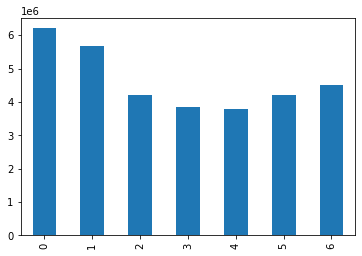

In [6]:
# create a bar chart showing orders by day of the week sorted by day of week

bar_orders_dow = df['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [5]:
# drop large prices from the observation

df.loc[df['prices'] >100, 'prices'] =np.nan

In [6]:
# ensure max value of prices is now in line

df['prices'].max()

25.0

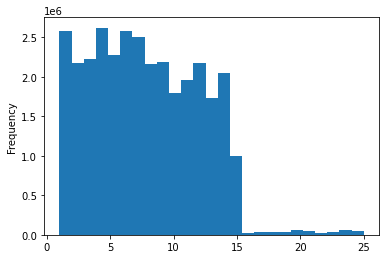

In [9]:
# create a histogram of the prices column

hist_prices = df['prices'].plot.hist(bins = 25)

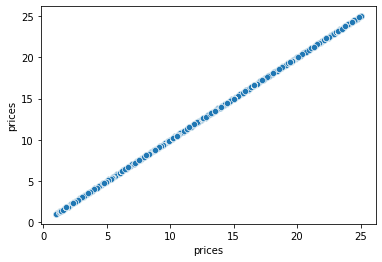

In [11]:
# create a scatter plot with prices on both the x and y axis

scatter_prices = sns.scatterplot(x = 'prices', y = 'prices', data = df)

In [19]:
np.random.seed(4)

In [20]:
# create a 70/30 sample set

dev = np.random.rand(len(df)) <= 0.7

In [21]:
# store 70 percent of the sample as 'big'

big = df[dev]

In [22]:
# store 30 percent of the sample as 'small'

small = df[~dev]

In [15]:
# check the length of the original data frame

len(df)

32404859

In [16]:
# verify the sample set adds up to the same size

len(big) + len(small)

32404859

In [23]:
# create a new data frame with just the orders day of week and prices columns from 'small'

df_small = small[['orders_day_of_week', 'prices']]

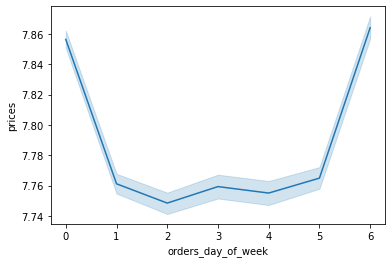

In [24]:
# create a line chart based on the small sample

line_prices_ordersdow = sns.lineplot(data = df_small, x = 'orders_day_of_week', y ='prices')

## Create a histogram for order hour of day (Q3)

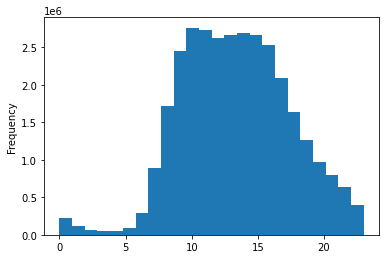

In [31]:
hist_orders_HOD = df['order_hour_of_day'].plot.hist(bins = 24)

The histogram shows that orders are low during the first few hours of the day (midnight through about 6 AM). The frequency rises rapidly then until it plateaus around 10 AM and stays at the same point until roughly 3 PM. From this time on it slowly decreases. 

## Create a bar chart for the loyalty flag (Q4)

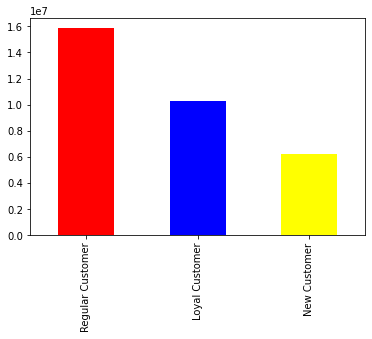

In [33]:
bar_loyalty = df['loyalty_flag'].value_counts().plot.bar(color = ['red', 'blue', 'yellow'])

## Create a line chart showing order hour of day and prices (Q5)

In [38]:
# 70/30 sample already created, create a data frame df_small_2 with just prices and order hour of day

df_small_2 = small[['order_hour_of_day', 'prices']]

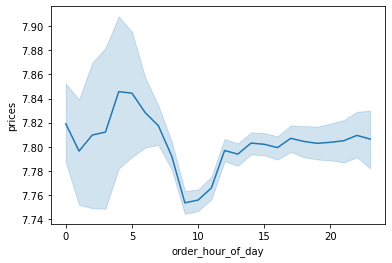

In [39]:
line_prices_ordersHOD = sns.lineplot(data = df_small_2, x = 'order_hour_of_day', y = 'prices')

## Create a line chart showing the relationship between age and number of dependants (Q6)

In [40]:
# 70/30 sample already created, create a data frame df_small_3 with just num of dependants and age

df_small_3 = small[['num_of_dependants', 'age']]

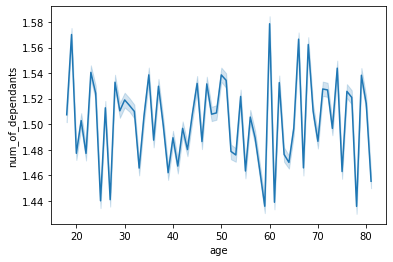

In [42]:
line_age_dependants = sns.lineplot(data = df_small_3, x = 'age', y = 'num_of_dependants')

The chart shows that there is not a correlation between age and number of dependants.

## Create a scatterplot showing age and income (Q7)


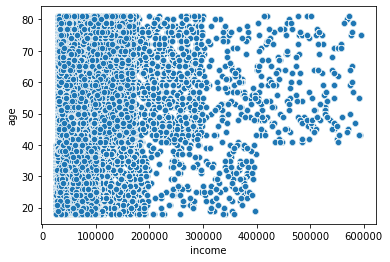

In [43]:
scatter_spending_power = sns.scatterplot(x = 'income', y = 'age', data = df)

The chart shows that most people, regardless of ageare making less than 200K. Some higher incomes are only represented in older populations. I.E., nobody under 40 is making more than 400K. 

## Export visualizations (Q8)

In [44]:
hist_orders_HOD.figure.savefig(os.path.join(path, '04 Analysis', 'Visuals', 'hist_orders_HOD.png'))

In [45]:
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visuals', 'bar_loyalty.png'))

In [46]:
line_prices_ordersHOD.figure.savefig(os.path.join(path, '04 Analysis', 'Visuals', 'line_prices_ordersHOD.png'))

In [47]:
line_age_dependants.figure.savefig(os.path.join(path, '04 Analysis', 'Visuals', 'line_age_dependants.png'))

In [48]:
scatter_spending_power.figure.savefig(os.path.join(path, '04 Analysis', 'Visuals', 'scatter_spending_power.png'))

In [9]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,_merge,busiest_day,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,days_since_median,frequency_flag,first_name,last_name,gender,state,age,date_joined,num_of_dependants,fam_status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,False,5,0,both,Regularly Busy,Mid Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,False,1,1,both,Regularly Busy,Mid Range Product,Regular Days,Average Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,Premium Sliced Bacon,106,12,20.0,3160996,138,1,5,13,NaN,True,4,0,both,Regularly Busy,High Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
3,907,Premium Sliced Bacon,106,12,20.0,2254091,138,10,5,14,6.0,False,1,1,both,Regularly Busy,High Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000,Apricots,18,10,12.9,505689,138,9,6,12,7.0,False,5,0,both,Regularly Busy,Mid Range Product,Regular Days,Most Orders,32,Regular Customer,6.935811,Low Spender,8.0,Frequent Customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620


In [ ]:
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))